In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [161]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
329,ham,I'm reading the text i just sent you. Its mean...,NaN,NaN,NaN
3069,ham,I'm now but have to wait till 2 for the bus to...,NaN,NaN,NaN
3926,ham,Lol ... I really need to remember to eat when ...,NaN,NaN,NaN
4043,ham,"Yes, my reg is Ciao!",NaN,NaN,NaN
4800,ham,The guy at the car shop who was flirting with ...,NaN,NaN,NaN


In [162]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [163]:
df["Unnamed: 2"].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [164]:
df["Unnamed: 3"].value_counts()

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: Unnamed: 3, dtype: int64

In [165]:
df["Unnamed: 4"].value_counts()

GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: Unnamed: 4, dtype: int64

In [166]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [168]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True,axis = 1)

In [169]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [170]:
df.rename(columns={"v1":"Target","v2":
                  "Text"},inplace=True)

In [171]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [172]:
df["Target"].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [173]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [174]:
df["Target"] = encoder.fit_transform(df["Target"])

In [175]:
df["Target"].head()

0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int32

In [176]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [177]:
df.duplicated().sum()

403

In [178]:
# Remove duplicates
df = df.drop_duplicates(keep = 'first')

In [179]:
df.duplicated().sum()

0

In [180]:
df.shape

(5169, 2)

## Exploratory Data Analysis



In [181]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x29176d69670>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

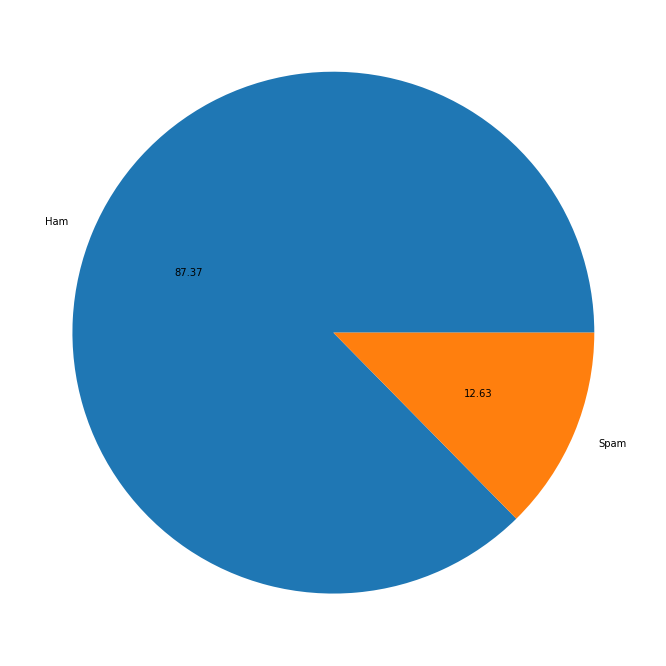

In [183]:
plt.figure(figsize=(14,12))
plt.pie(df["Target"].value_counts(),labels=["Ham","Spam"],autopct="%0.2f")

Data is imbalance

In [184]:
import nltk

In [185]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [186]:
df["Num_characters"] = df["Text"].apply(len)

In [187]:
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [188]:
from nltk.tokenize import word_tokenize

In [189]:
df["Num_word"] = df["Text"].apply(lambda x:len(word_tokenize(x)))

In [190]:
df.head()

,Target,Text,Num_characters,Num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [191]:
df["num_sent"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [192]:
df.head()

,Target,Text,Num_characters,Num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [193]:
df[["Num_characters","Num_word","num_sent"]].describe()

,Num_characters,Num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [194]:
df[df["Num_characters"]==2]

,Target,Text,Num_characters,Num_word,num_sent
1924,0,Ok,2,1,1


In [195]:
df[df["Num_characters"]==910]

,Target,Text,Num_characters,Num_word,num_sent
1084,0,For me the love should start with attraction.i...,910,175,1


In [196]:
# Ham messages
df[df["Target"]==0][["Num_characters","Num_word","num_sent"]].describe()

,Num_characters,Num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [197]:
# Spam messages
df[df["Target"]==1][["Num_characters","Num_word","num_sent"]].describe()

,Num_characters,Num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Clearly, we can see that on an average the spam messages are usually bigger in length than ham messages

<AxesSubplot:ylabel='Count'>

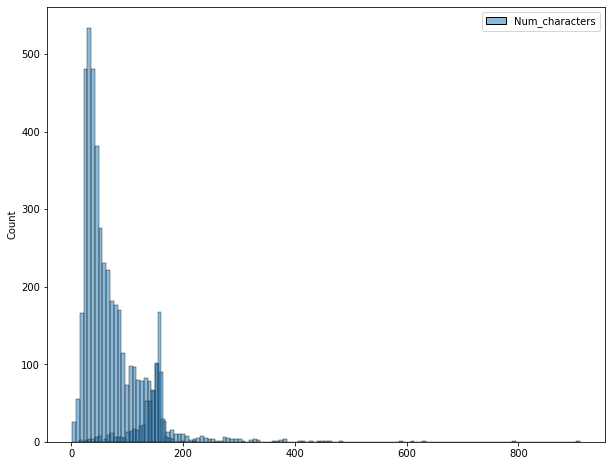

In [198]:
plt.figure(figsize=(10,8))
sns.histplot(df[df["Target"]==0][["Num_characters"]])
sns.histplot(df[df["Target"]==1][["Num_characters"]],color = 'red')

<AxesSubplot:ylabel='Count'>

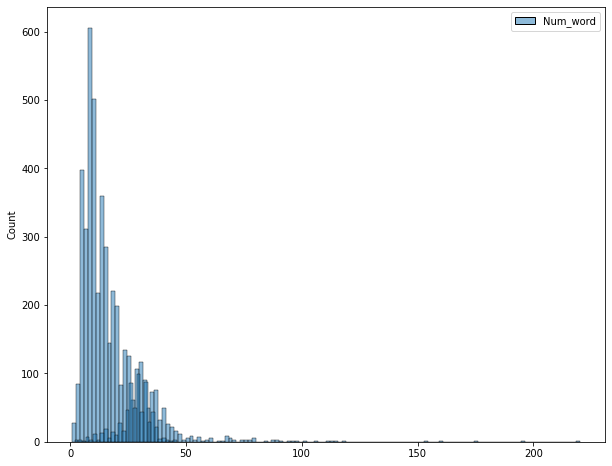

In [199]:
plt.figure(figsize=(10,8))
sns.histplot(df[df["Target"]==0][["Num_word"]])
sns.histplot(df[df["Target"]==1][["Num_word"]],color = 'red')

<Figure size 864x432 with 0 Axes>

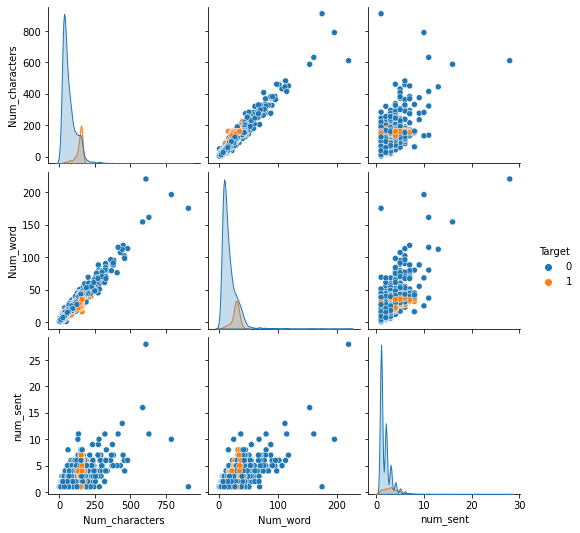

In [200]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue = 'Target')

Clearly, we can see that we have outliers in the data

In [201]:
df.corr()

,Target,Num_characters,Num_word,num_sent
Target,1.000000,0.384717,0.262984,0.284901
Num_characters,0.384717,1.000000,0.965770,0.638143
Num_word,0.262984,0.965770,1.000000,0.684541
num_sent,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

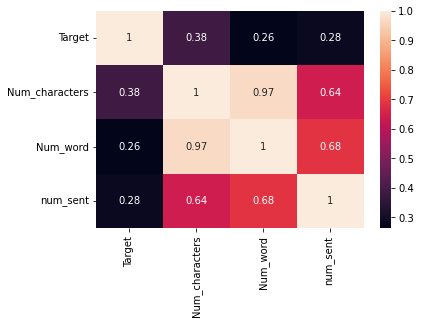

In [202]:
sns.heatmap(df.corr(),annot=True)

So, we will use num_characters column for our prediction because the variation it is having with Target variable is acceptable.

## Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemmming

In [203]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [204]:
from nltk.stem.porter import PorterStemmer
Ps = PorterStemmer()
Ps.stem("dancing")

'danc'

In [205]:
def transform_text(Text):
    Text = Text.lower()
    Text = word_tokenize(Text)
    carry = []
    for i in Text:
        if i.isalnum():
            carry.append(i)
    y = []
    for i in carry:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    carry.clear()
    carry = []
    for i in y:
        carry.append(Ps.stem(i))
    y.clear()
    return " ".join(carry)

In [206]:
transform_text("Hi 2 how$ are %You? Aditya")

'hi 2 aditya'

In [207]:
transform_text("Hey did you watched my project?")

'hey watch project'

In [208]:
print(df["Text"][0]+"\n")
transform_text(df["Text"][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [209]:
df["Transformed_data"] = df["Text"].apply(transform_text)

In [210]:
df.head()

,Target,Text,Num_characters,Num_word,num_sent,Transformed_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [230]:
spam_words = []
for msg in df[df["Target"]==1]["Transformed_data"].tolist():
    for word in msg.split():
        spam_words.append(word)

In [231]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


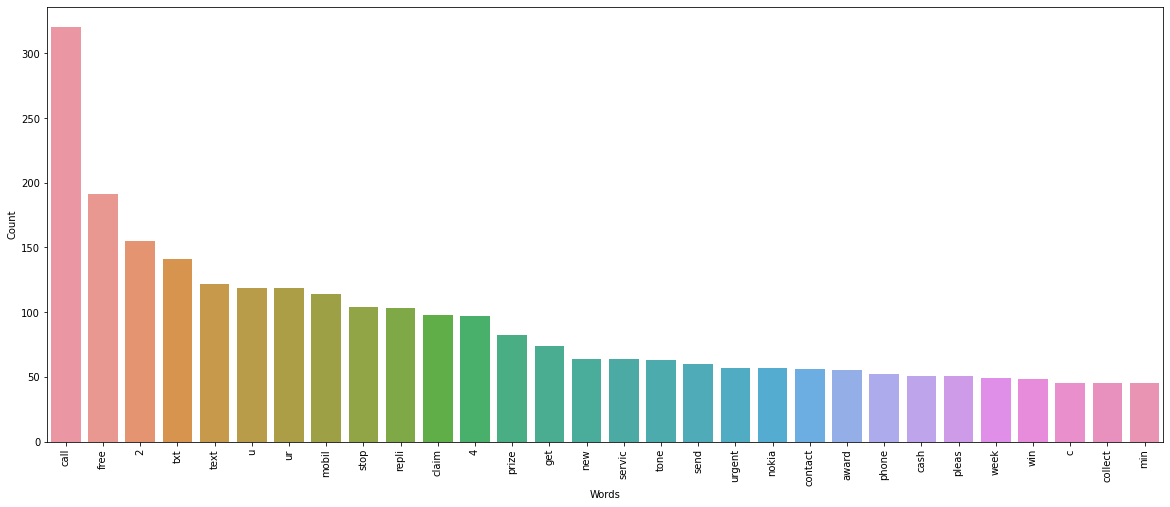

In [245]:
from collections import Counter
plt.figure(figsize =(20,8))
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

In [246]:
ham_words = []
for msg in df[df["Target"]==0]["Transformed_data"].tolist():
    for word in msg.split():
        ham_words.append(word)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


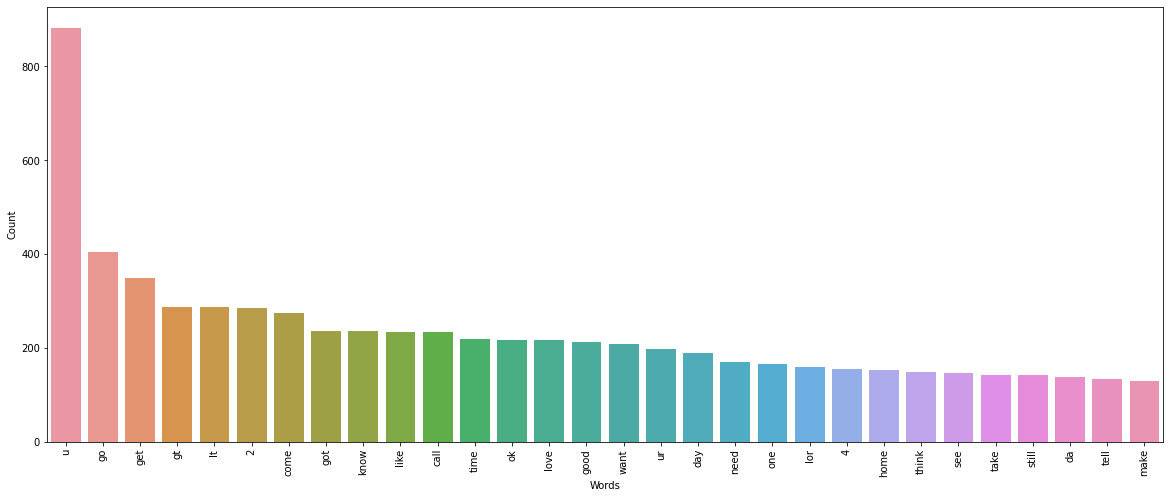

In [248]:
plt.figure(figsize =(20,8))
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

## MODEL BUILDING

In [263]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [252]:
x = cv.fit_transform(df["Transformed_data"]).toarray()

In [264]:
x2 = tfidf.fit_transform(df["Transformed_data"]).toarray()

In [254]:
x.shape

(5169, 6708)

In [265]:
x2.shape

(5169, 6708)

In [255]:
y = df["Target"].values

In [256]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [266]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.2,random_state=2)

In [258]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [260]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [261]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [262]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [267]:
gnb.fit(X_train2, y_train2)
y_pred12 = gnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred12))
print(confusion_matrix(y_test2,y_pred12))
print(precision_score(y_test2,y_pred12))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [268]:
mnb.fit(X_train2, y_train2)
y_pred22 = mnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred22))
print(confusion_matrix(y_test2,y_pred22))
print(precision_score(y_test2,y_pred22))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [269]:
bnb.fit(X_train2, y_train2)
y_pred33 = bnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred33))
print(confusion_matrix(y_test2,y_pred33))
print(precision_score(y_test2,y_pred33))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


So, we will go with Mulnomial Naive Bayes because precision accuracy is Best here

Here, we applied tfidf and Multinomial naive bayes

In [287]:
# model improve
# 1. change the max_features parameter of tfidf

In [288]:
tfidf = TfidfVectorizer(max_features=3000)
x2 = tfidf.fit_transform(df["Transformed_data"]).toarray()
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.2,random_state=2)

In [289]:

mnb.fit(X_train2, y_train2)
y_pred22 = mnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred22))
print(confusion_matrix(y_test2,y_pred22))
print(precision_score(y_test2,y_pred22))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


## Let's try scaling and then applying to our model

In [278]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x2 = scaler.fit_transform(x2)'''

In [279]:
'''X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.2,random_state=2)'''

In [280]:
'''mnb.fit(X_train2, y_train2)
y_pred22 = mnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred22))
print(confusion_matrix(y_test2,y_pred22))
print(precision_score(y_test2,y_pred22))'''

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


### we can clearly see that scaling is not improving our accuracy so we will not use it

## Let's try appending a new column and see if our model scores climbs up or not.

In [284]:
"""x2 = np.hstack((x2,df["Num_characters"].values.reshape(-1,1)))"""

In [285]:
#x2.shape

(5169, 3001)

In [286]:
'''X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.2,random_state=2)

mnb.fit(X_train2, y_train2)
y_pred22 = mnb.predict(X_test2)
print(accuracy_score(y_test2,y_pred22))
print(confusion_matrix(y_test2,y_pred22))
print(precision_score(y_test2,y_pred22))'''

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


### Clearly, we can see that there is no improvement in our accuracy so we will not use Num_characters column

In [291]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))